# __DICODING MACHINE LEARNING__
Nama : Fahmy Rosyadi <br>
Asal Instansi : Politeknik Negeri Jember
<br>
Proyek : Sentiment Analisis Ulasan Debat Pemilu 2024 Menggunakan NLP

## Load Dataset CSV dari Google Drive

> Import All Libraries

In [114]:
!pip install Sastrawi

In [1]:
!pip install googletrans==4.0.0-rc1

In [2]:
!pip install preprocessor

In [3]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
import googletrans as gt
from googletrans import Translator
import preprocessor as pre
from textblob import TextBlob
import nltk
import numpy as np
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from keras.layers import Input, LSTM, Bidirectional, SpatialDropout1D, Dropout, Flatten, Dense, Embedding, BatchNormalization
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import tensorflow as tf
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
df = pd.read_csv("/content/drive/MyDrive/DatasetCollab/UlasanDebat/UlasanDebatPemilu24.csv")
df.head(10)

,Unnamed: 0,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,Kategori
0,0,Fri Dec 15 04:04:44 +0000 2023,1.735511e+18,"@dedy_pram Pastilah, Prabowo Anies nggak punya...",0.0,0,0.0,0.0,in,797761417894051840,1.735147e+18,MarahIchsan,https://twitter.com/MarahIchsan/status/1735511...,Capres
1,1,Fri Dec 15 04:04:33 +0000 2023,1.735511e+18,Suasana pedesaan memang selalu menyenangkan......,0.0,0,0.0,0.0,in,936445409605459968,1.735511e+18,Agung_wiyo,https://twitter.com/Agung_wiyo/status/17355111...,Capres
2,2,Fri Dec 15 04:04:31 +0000 2023,1.735511e+18,Program anies hanyalah mengubah nama rumah sak...,0.0,0,0.0,0.0,in,768652236,1.735511e+18,Alfakton_i,https://twitter.com/Alfakton_i/status/17355111...,Capres
3,3,Fri Dec 15 04:04:27 +0000 2023,1.735511e+18,@kumparan @aniesbaswedan anies... BERBOHONG DA...,0.0,0,0.0,0.0,in,1710823909275410432,1.735146e+18,justtheway333,https://twitter.com/justtheway333/status/17355...,Capres
4,4,Fri Dec 15 04:04:26 +0000 2023,1.735511e+18,Tidak Bicara Sesuai Fakta! Anies Dengan Lantan...,0.0,0,1.0,1.0,in,1661757337554784264,1.735511e+18,singgihabdrchmn,https://twitter.com/singgihabdrchmn/status/173...,Capres
5,5,Fri Dec 15 04:04:25 +0000 2023,1.735511e+18,Prabowo Sindir Anies Baswedan: APBD Paling Bes...,0.0,1,1.0,1.0,in,1661757337554784264,1.735511e+18,singgihabdrchmn,https://twitter.com/singgihabdrchmn/status/173...,Capres
6,6,Fri Dec 15 04:04:15 +0000 2023,1.735511e+18,@hasyimmah Alesan harus jelas dan pak anies su...,0.0,0,0.0,1.0,in,3157194798,1.735192e+18,7f33229758ab489,https://twitter.com/7f33229758ab489/status/173...,Capres
7,7,Fri Dec 15 04:04:13 +0000 2023,1.735511e+18,@brochandra @ainunnajib Wow mantap sekali. Apa...,0.0,0,0.0,0.0,in,353739058,1.735453e+18,MisterMarmut,https://twitter.com/MisterMarmut/status/173551...,Capres
8,8,Fri Dec 15 04:04:12 +0000 2023,1.735511e+18,@ajengcute16__ saya dulu belajar majas kelas ...,0.0,0,0.0,0.0,in,1410420836499066883,1.735154e+18,id_edx,https://twitter.com/id_edx/status/173551104871...,Capres
9,9,Fri Dec 15 04:04:03 +0000 2023,1.735511e+18,"@tvOneNews Kasian kiki, padahal itu fakta, mem...",0.0,0,0.0,0.0,in,1596864352174604288,1.735465e+18,bimasakti_2013,https://twitter.com/bimasakti_2013/status/1735...,Capres


In [5]:
df = df[['full_text', 'username', 'Kategori','created_at']]
df

,full_text,username,Kategori,created_at
0,"@dedy_pram Pastilah, Prabowo Anies nggak punya...",MarahIchsan,Capres,Fri Dec 15 04:04:44 +0000 2023
1,Suasana pedesaan memang selalu menyenangkan......,Agung_wiyo,Capres,Fri Dec 15 04:04:33 +0000 2023
2,Program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Capres,Fri Dec 15 04:04:31 +0000 2023
3,@kumparan @aniesbaswedan anies... BERBOHONG DA...,justtheway333,Capres,Fri Dec 15 04:04:27 +0000 2023
4,Tidak Bicara Sesuai Fakta! Anies Dengan Lantan...,singgihabdrchmn,Capres,Fri Dec 15 04:04:26 +0000 2023
...,...,...,...,...
2599,"@DokterTifa @cakimiNOW G msk akaaalllll, orang...",risnand59179688,Cawapres,Mon Dec 25 02:41:41 +0000 2023
2600,"@Heraloebss Bismillah.. Amin, Anies -Muhaimin ...",ado_ono,Cawapres,Mon Dec 25 02:40:45 +0000 2023
2601,"@Arie_Kriting Bismillah.. Amin, Anies -Muhaimi...",ado_ono,Cawapres,Mon Dec 25 02:39:01 +0000 2023
2602,"@VIVAcoid Bismillah.. Amin, Anies -Muhaimin P...",ado_ono,Cawapres,Mon Dec 25 02:35:11 +0000 2023


In [6]:
df.shape

(2604, 4)

## Lakukan Preprocessing Data

In [7]:
df = df.drop_duplicates(subset=['full_text'])

In [8]:
df.duplicated().sum()

0

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

full_text     0
username      0
Kategori      0
created_at    0
dtype: int64

In [11]:
df.shape

(2557, 4)

In [12]:
def clean_twitter_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', ' ', text)
    text = re.sub(r'#\w+', ' ', text)
    text = re.sub(r'RT[\s]+', ' ', text)
    text = re.sub(r'https?://\S+', ' ', text)

    text = re.sub(r'[^A-Za-z0-9 ]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [13]:
df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [14]:
df['full_text'] = df['full_text'].str.lower()

In [15]:
df

,full_text,username,Kategori,created_at
0,pastilah prabowo anies nggak punya prestasi,MarahIchsan,Capres,Fri Dec 15 04:04:44 +0000 2023
1,suasana pedesaan memang selalu menyenangkan ud...,Agung_wiyo,Capres,Fri Dec 15 04:04:33 +0000 2023
2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Capres,Fri Dec 15 04:04:31 +0000 2023
3,anies berbohong dan nipu tanpa rasa bersalah,justtheway333,Capres,Fri Dec 15 04:04:27 +0000 2023
4,tidak bicara sesuai fakta anies dengan lantang...,singgihabdrchmn,Capres,Fri Dec 15 04:04:26 +0000 2023
...,...,...,...,...
2599,g msk akaaalllll orang ditanya sm rakyat sm ma...,risnand59179688,Cawapres,Mon Dec 25 02:41:41 +0000 2023
2600,bismillah amin anies muhaimin presiden dan wak...,ado_ono,Cawapres,Mon Dec 25 02:40:45 +0000 2023
2601,bismillah amin anies muhaimin presiden dan wak...,ado_ono,Cawapres,Mon Dec 25 02:39:01 +0000 2023
2602,bismillah amin anies muhaimin presiden dan wak...,ado_ono,Cawapres,Mon Dec 25 02:35:11 +0000 2023


In [16]:
norm = {"yg": "yang",'nggak': 'tidak', 'akaaalllll':'akal','msk':'masuk',"nipu":"menipu","tdk" : "tidak",'bangetdari': ' banget dari', "vibes" : "suasana","menilau" : "menilai", "mo" : "ingin"}

In [17]:
def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

In [18]:
df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,full_text,username,Kategori,created_at
0,pastilah prabowo anies tidak punya prestasi,MarahIchsan,Capres,Fri Dec 15 04:04:44 +0000 2023
1,suasana pedesaan memang selalu menyenangkan ud...,Agung_wiyo,Capres,Fri Dec 15 04:04:33 +0000 2023
2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Capres,Fri Dec 15 04:04:31 +0000 2023
3,anies berbohong dan menipu tanpa rasa bersalah,justtheway333,Capres,Fri Dec 15 04:04:27 +0000 2023
4,tidak bicara sesuai fakta anies dengan lantang...,singgihabdrchmn,Capres,Fri Dec 15 04:04:26 +0000 2023
...,...,...,...,...
2599,g masuk akal orang ditanya sm rakyat sm mahasi...,risnand59179688,Cawapres,Mon Dec 25 02:41:41 +0000 2023
2600,bismillah amin anies muhaimin presiden dan wak...,ado_ono,Cawapres,Mon Dec 25 02:40:45 +0000 2023
2601,bismillah amin anies muhaimin presiden dan wak...,ado_ono,Cawapres,Mon Dec 25 02:39:01 +0000 2023
2602,bismillah amin anies muhaimin presiden dan wak...,ado_ono,Cawapres,Mon Dec 25 02:35:11 +0000 2023


In [19]:
more_stop_words = ["tidak","yang","dan","di","g"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
new_stop_words_remover = StopWordRemover(new_array)

In [20]:
def stopword(str_text):
  str_text = new_stop_words_remover.remove(str_text)
  return str_text

In [21]:
df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df.head()

,full_text,username,Kategori,created_at
0,pastilah prabowo anies punya prestasi,MarahIchsan,Capres,Fri Dec 15 04:04:44 +0000 2023
1,suasana pedesaan memang selalu menyenangkan ud...,Agung_wiyo,Capres,Fri Dec 15 04:04:33 +0000 2023
2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Capres,Fri Dec 15 04:04:31 +0000 2023
3,anies berbohong menipu rasa bersalah,justtheway333,Capres,Fri Dec 15 04:04:27 +0000 2023
4,bicara sesuai fakta anies lantang sebut lampun...,singgihabdrchmn,Capres,Fri Dec 15 04:04:26 +0000 2023


In [22]:
def convert_eng(tweet):
    translator = Translator()
    translation = translator.translate(tweet, src='id', dest='en')

    if translation and hasattr(translation, 'text'):
        return translation.text
    else:
        return tweet

In [23]:
df['tweet_english'] = df['full_text'].apply(convert_eng)
df.to_csv('/content/drive/MyDrive/DatasetCollab/UlasanDebat/TranslateUlasanDebatPemilu.csv')

In [24]:
data = pd.read_csv('/content/drive/MyDrive/DatasetCollab/UlasanDebat/TranslateUlasanDebatPemilu.csv')
data.head(500)

,Unnamed: 0,full_text,username,Kategori,created_at,tweet_english
0,0,pastilah prabowo anies punya prestasi,MarahIchsan,Capres,Fri Dec 15 04:04:44 +0000 2023,Surely Prabowo Anies has an achievement
1,1,suasana pedesaan memang selalu menyenangkan ud...,Agung_wiyo,Capres,Fri Dec 15 04:04:33 +0000 2023,The rural atmosphere is always pleased the fre...
2,2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Capres,Fri Dec 15 04:04:31 +0000 2023,Anies program is only changing the name of a h...
3,3,anies berbohong menipu rasa bersalah,justtheway333,Capres,Fri Dec 15 04:04:27 +0000 2023,Anies lied to deceive guilt
4,4,bicara sesuai fakta anies lantang sebut lampun...,singgihabdrchmn,Capres,Fri Dec 15 04:04:26 +0000 2023,Talk according to the facts of Anies Lantang T...
...,...,...,...,...,...,...
495,502,berarti jahat bukan anies rezim jokowi,armanhermawan3,Capres,Fri Dec 15 03:36:33 +0000 2023,means evil is not Anies Jokowi's regime
496,503,wan abud avatar legendaris sang pengendali ang...,salwaadheliaa,Capres,Fri Dec 15 03:36:29 +0000 2023,Wan Abud Avatar Legendary Sang Wind Controller...
497,504,anies baswedan hanya berbicara juga bertindak ...,BaktiPutra69,Capres,Fri Dec 15 03:36:22 +0000 2023,Anies Baswedan only spoke also acted to improv...
498,505,ganjar mahfud menang indonesia sat set berjaya...,SimpatisnGanjar,Capres,Fri Dec 15 03:36:19 +0000 2023,Ganjar Mahfud Winning Indonesia Sat Set Tag Ga...


In [25]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
      total_positif += 1
      status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
      total_netral += 1
      status.append('Netral')
    else:
      total_negatif += 1
      status.append('Negatif')
    total +=1

In [26]:
print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'Total Data : {total}')

Hasil Analisis Data:
Positif = 1414
Netral = 840
Negatif = 303
Total Data : 2557


In [27]:
data['klasifikasi'] = status
data

,Unnamed: 0,full_text,username,Kategori,created_at,tweet_english,klasifikasi
0,0,pastilah prabowo anies punya prestasi,MarahIchsan,Capres,Fri Dec 15 04:04:44 +0000 2023,Surely Prabowo Anies has an achievement,Positif
1,1,suasana pedesaan memang selalu menyenangkan ud...,Agung_wiyo,Capres,Fri Dec 15 04:04:33 +0000 2023,The rural atmosphere is always pleased the fre...,Positif
2,2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Capres,Fri Dec 15 04:04:31 +0000 2023,Anies program is only changing the name of a h...,Netral
3,3,anies berbohong menipu rasa bersalah,justtheway333,Capres,Fri Dec 15 04:04:27 +0000 2023,Anies lied to deceive guilt,Netral
4,4,bicara sesuai fakta anies lantang sebut lampun...,singgihabdrchmn,Capres,Fri Dec 15 04:04:26 +0000 2023,Talk according to the facts of Anies Lantang T...,Positif
...,...,...,...,...,...,...,...
2552,2599,masuk akal orang ditanya sm rakyat sm mahasisw...,risnand59179688,Cawapres,Mon Dec 25 02:41:41 +0000 2023,It makes sense that people are asked by the pe...,Netral
2553,2600,bismillah amin anies muhaimin presiden wakil p...,ado_ono,Cawapres,Mon Dec 25 02:40:45 +0000 2023,Bismillah Amin Anies Muhaimin President Vice P...,Netral
2554,2601,bismillah amin anies muhaimin presiden wakil p...,ado_ono,Cawapres,Mon Dec 25 02:39:01 +0000 2023,Bismillah Amin Anies Muhaimin President Vice P...,Netral
2555,2602,bismillah amin anies muhaimin presiden wakil p...,ado_ono,Cawapres,Mon Dec 25 02:35:11 +0000 2023,Bismillah Amin Anies Muhaimin President Vice P...,Netral


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     2557 non-null   int64 
 1   full_text      2557 non-null   object
 2   username       2557 non-null   object
 3   Kategori       2557 non-null   object
 4   created_at     2557 non-null   object
 5   tweet_english  2557 non-null   object
 6   klasifikasi    2557 non-null   object
dtypes: int64(1), object(6)
memory usage: 140.0+ KB


In [29]:
data.klasifikasi.value_counts()

Positif    1414
Netral      840
Negatif     303
Name: klasifikasi, dtype: int64

In [30]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(10,8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

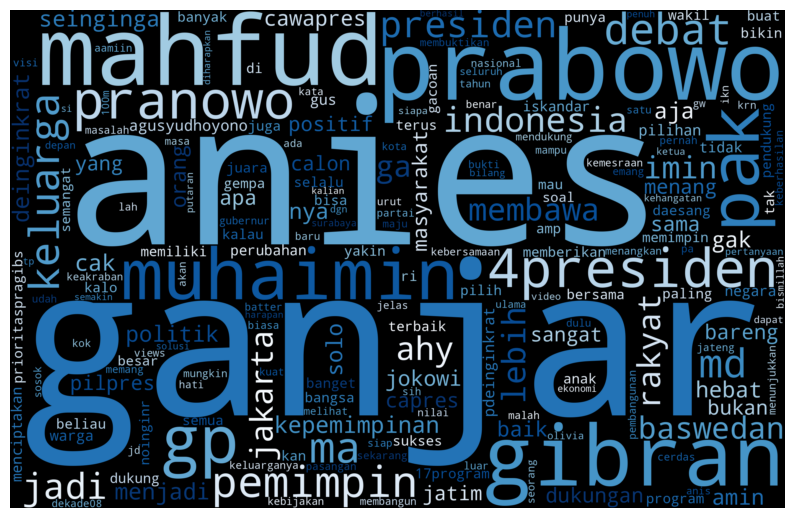

In [31]:
all_words = ' '.join([tweet for tweet in data['full_text']])

wordcloud = WordCloud(
    width = 2800,
    height = 1800,
    random_state=3,
    background_color='black',
    colormap = 'Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

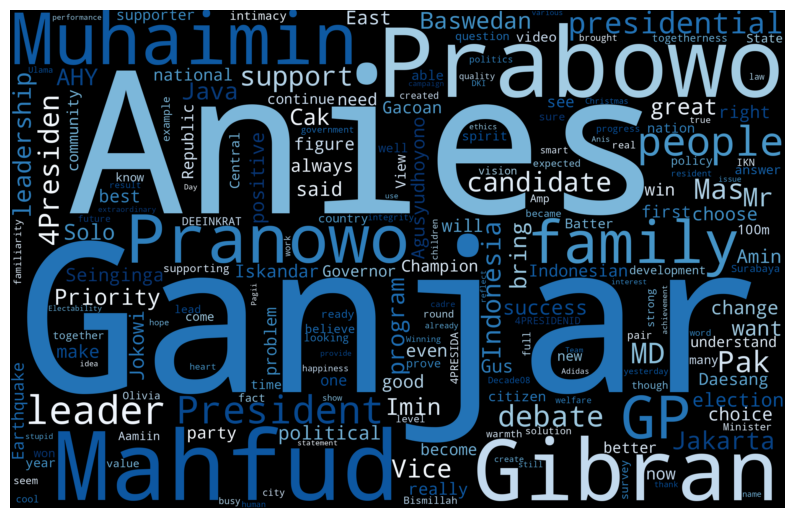

In [32]:
all_words = ' '.join([tweet for tweet in data['tweet_english']])

wordcloud = WordCloud(
    width = 2800,
    height = 1800,
    random_state=3,
    background_color='black',
    colormap = 'Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

## Pelabelan data

In [57]:
klasifikasi = pd.get_dummies(data.klasifikasi)
df_new = pd.concat([data, klasifikasi], axis=1)
df_new = df_new.drop(columns='klasifikasi')
df_new.head(10)

,Unnamed: 0,full_text,username,Kategori,created_at,tweet_english,Negatif,Netral,Positif
0,0,pastilah prabowo anies punya prestasi,MarahIchsan,Capres,Fri Dec 15 04:04:44 +0000 2023,Surely Prabowo Anies has an achievement,0,0,1
1,1,suasana pedesaan memang selalu menyenangkan ud...,Agung_wiyo,Capres,Fri Dec 15 04:04:33 +0000 2023,The rural atmosphere is always pleased the fre...,0,0,1
2,2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Capres,Fri Dec 15 04:04:31 +0000 2023,Anies program is only changing the name of a h...,0,1,0
3,3,anies berbohong menipu rasa bersalah,justtheway333,Capres,Fri Dec 15 04:04:27 +0000 2023,Anies lied to deceive guilt,0,1,0
4,4,bicara sesuai fakta anies lantang sebut lampun...,singgihabdrchmn,Capres,Fri Dec 15 04:04:26 +0000 2023,Talk according to the facts of Anies Lantang T...,0,0,1
5,5,prabowo sindir anies baswedan apbd paling besa...,singgihabdrchmn,Capres,Fri Dec 15 04:04:25 +0000 2023,Prabowo Sindir Anies Baswedan APBD is the bigg...,0,0,1
6,6,alesan jelas pak anies menjelaskan sejelas jel...,7f33229758ab489,Capres,Fri Dec 15 04:04:15 +0000 2023,clear reasons Mr. Anies explains as clear as i...,1,0,0
7,7,wow mantap sekali ini artinya bro anies menjad...,MisterMarmut,Capres,Fri Dec 15 04:04:13 +0000 2023,wow this great means Bro Anies is the Presiden...,0,0,1
8,8,dulu belajar majas kelas 8 smp paham apa dibil...,id_edx,Capres,Fri Dec 15 04:04:12 +0000 2023,"In the past, studying for grade 8 junior high ...",1,0,0
9,9,kasian kiki padahal fakta memang si anies jago...,bimasakti_2013,Capres,Fri Dec 15 04:04:03 +0000 2023,Poor Kiki even though the fact is that Anies i...,0,0,1


In [58]:
def remove_stopwords(text):
  words = text.split()
  new_text = ""
  for word in words:
    if word not in stopwords.words('english'):
      new_text += word
      new_text += " "

  return new_text

def lematized_text(text):
  lematizer = WordNetLemmatizer()
  words = text.split()
  new_text = ""
  for word in words:
    lematized_word = lematizer.lemmatize(word)
    new_text += lematized_word
    new_text += " "
  return new_text


def preprocessing (text):
  text = text.lower()
  text = remove_stopwords(text)
  text = lematized_text(text)

  return text

In [59]:
for i in range(len(df_new)):
    df_new.loc[i, 'tweet_english'] = preprocessing(df_new.loc[i, 'tweet_english'])

In [60]:
text = df_new['tweet_english'].values
label = df_new[['Negatif', 	'Netral', 'Positif']].values

In [61]:
df_new['tweet_english']

0                       surely prabowo anies achievement 
1       rural atmosphere always pleased fresh air fres...
2       anies program changing name hospital indonesia...
3                               anies lied deceive guilt 
4       talk according fact anies lantang temut lampun...
                              ...                        
2552    make sense people asked people people sj plang...
2553    bismillah amin anies muhaimin president vice p...
2554    bismillah amin anies muhaimin president vice p...
2555    bismillah amin anies muhaimin president vice p...
2556                                      anies muhaimin 
Name: tweet_english, Length: 2557, dtype: object

## Split data train dan testing

In [62]:
from sklearn.model_selection import train_test_split
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2, shuffle=True)

In [63]:
label_train

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

## Pelatihan Model

In [69]:
tokenizer = Tokenizer(num_words=500, oov_token='<oov>')
tokenizer.fit_on_texts(text_train)
tokenizer.fit_on_texts(text_test)

sequences_train = tokenizer.texts_to_sequences(text_train)
sequences_test = tokenizer.texts_to_sequences(text_test)

padded_train = pad_sequences(sequences_train, maxlen=37, padding='post', truncating='post')
padded_test = pad_sequences(sequences_test, maxlen=37, padding='post', truncating='post')


In [108]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=500, output_dim=100, input_length=37),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

val_accuracy = tf.keras.metrics.Accuracy(name='val_accuracy')
model.compile(optimizer= 'adam', metrics=['accuracy'], loss= CategoricalCrossentropy())
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 37, 100)           50000     
                                                                 
 lstm_7 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_15 (Dense)            (None, 3)                 303       
                                                                 
Total params: 140803 (550.01 KB)
Trainable params: 140

In [109]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      accuracy = logs.get('accuracy')
      val_accuracy = logs.get('val_accuracy')
      if accuracy is not None and accuracy > 0.90 and val_accuracy > 0.90:
        print("\nAkurasi telah mencapai > 90%!")
        self.model.stop_training = True

callbacks = myCallback()

In [110]:
len(label)

2557

In [111]:
history = model.fit(padded_train,
                    label_train,
                    epochs=50,
                    steps_per_epoch=50,
                    validation_data=(padded_test, label_test),
                    verbose=2,
                    callbacks=[callbacks],
                    validation_steps=25)

Epoch 1/50
50/50 - 4s - loss: 0.9669 - accuracy: 0.5506 - val_loss: 0.9636 - val_accuracy: 0.5371 - 4s/epoch - 87ms/step
Epoch 2/50
50/50 - 2s - loss: 0.9481 - accuracy: 0.5565 - val_loss: 0.9612 - val_accuracy: 0.5371 - 2s/epoch - 36ms/step
Epoch 3/50
50/50 - 3s - loss: 0.9110 - accuracy: 0.5628 - val_loss: 0.8894 - val_accuracy: 0.5938 - 3s/epoch - 52ms/step
Epoch 4/50
50/50 - 2s - loss: 0.7813 - accuracy: 0.6406 - val_loss: 0.8706 - val_accuracy: 0.6484 - 2s/epoch - 35ms/step
Epoch 5/50
50/50 - 2s - loss: 0.6368 - accuracy: 0.7271 - val_loss: 0.7749 - val_accuracy: 0.6445 - 2s/epoch - 34ms/step
Epoch 6/50
50/50 - 2s - loss: 0.5364 - accuracy: 0.8005 - val_loss: 0.7241 - val_accuracy: 0.7148 - 2s/epoch - 34ms/step
Epoch 7/50
50/50 - 2s - loss: 0.5097 - accuracy: 0.8068 - val_loss: 0.7524 - val_accuracy: 0.7363 - 2s/epoch - 37ms/step
Epoch 8/50
50/50 - 2s - loss: 0.4809 - accuracy: 0.8342 - val_loss: 0.7177 - val_accuracy: 0.7402 - 2s/epoch - 34ms/step
Epoch 9/50
50/50 - 3s - loss: 0.

## Evaluasi Model

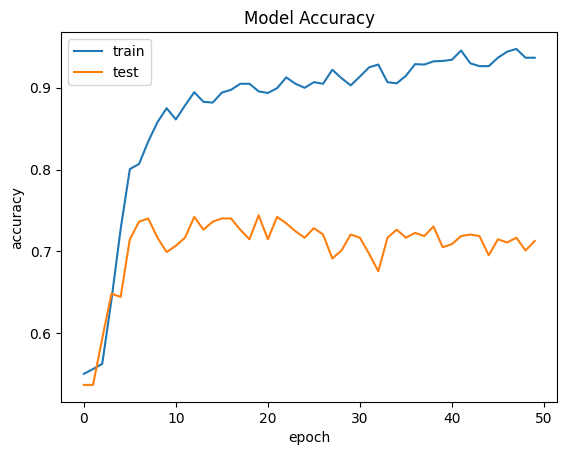

In [112]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


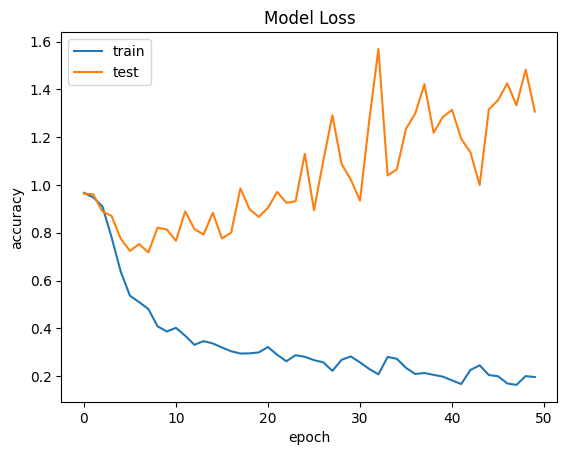

In [113]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


## Testing Model

In [114]:
class_labels = ['Negatif', 'Netral', 'Positif']
label_predict_prob = model.predict(padded_test)
predicted_classes = np.argmax(label_predict_prob, axis=1)

threshold_positif = 0.5
threshold_netral = 0.5

predicted_labels = []

for prob in label_predict_prob:
    if prob[2] >= threshold_positif:
        predicted_labels.append('Positif')
    elif prob[1] >= threshold_netral:
        predicted_labels.append('Netral')
    else:
        predicted_labels.append('Negatif')

df_results = pd.DataFrame({
    'Text': text_test,
    'True_Label': [class_labels[np.argmax(label)] for label in label_test],
    'Predicted_Label': predicted_labels,
    'Probability': [max(prob) for prob in label_predict_prob]
})


16/16 [==============================] - 0s 8ms/step


In [115]:
df_results.head(15)

,Text,True_Label,Predicted_Label,Probability
0,ganjar pranowo kaesang erina gudono party pest...,Positif,Positif,0.998479
1,"support mas, bang mean mean original supportin...",Positif,Positif,0.996565
2,central java resident increasingly convinced c...,Positif,Positif,0.998408
3,solo economy skyrocketed thank gibran jakarta ...,Netral,Netral,0.955629
4,raw nature vice president anies arrogant arrog...,Negatif,Positif,0.995920
5,pak ganjar pranowo program great ganjar mahfud...,Positif,Positif,0.997923
6,mahfud md seinginga concern togetherness posit...,Positif,Positif,0.998443
7,"maakkk try want ask fasting hide bali chicken,...",Negatif,Positif,0.998420
8,ganjar pranowo family reflection leadership lo...,Positif,Positif,0.993494
9,holiday tlh arrived recreation jg rone heart k...,Netral,Positif,0.605347
